# Stacking

<div class="alert alert-info">

This tutorial is available as an IPython notebook at [Malaya/example/stacking](https://github.com/huseinzol05/Malaya/tree/master/example/stacking).
    
</div>

### Why Stacking?

Sometime a single model is not good enough. So, you need to use multiple models to get a better result! It called stacking.

In [1]:
%%time
import malaya

CPU times: user 2.91 s, sys: 2.59 s, total: 5.49 s
Wall time: 2.45 s


/home/husein/dev/malaya/malaya/tokenizer.py:214: FutureWarning: Possible nested set at position 3397
  self.tok = re.compile(r'({})'.format('|'.join(pipeline)))
/home/husein/dev/malaya/malaya/tokenizer.py:214: FutureWarning: Possible nested set at position 3927
  self.tok = re.compile(r'({})'.format('|'.join(pipeline)))


In [2]:
malaya.sentiment.available_huggingface

{'mesolitica/sentiment-analysis-nanot5-tiny-malaysian-cased': {'Size (MB)': 93,
  'macro precision': 0.67768,
  'macro recall': 0.68266,
  'macro f1-score': 0.67997},
 'mesolitica/sentiment-analysis-nanot5-small-malaysian-cased': {'Size (MB)': 167,
  'macro precision': 0.67602,
  'macro recall': 0.6712,
  'macro f1-score': 0.67339}}

In [4]:
tiny = malaya.sentiment.huggingface(model = 'mesolitica/sentiment-analysis-nanot5-tiny-malaysian-cased')
small = malaya.sentiment.huggingface(model = 'mesolitica/sentiment-analysis-nanot5-small-malaysian-cased')
multinomial = malaya.sentiment.multinomial()

### Stack multiple sentiment models

`malaya.stack.predict_stack` provide an easy stacking solution for Malaya models. Well, not just for sentiment models, any classification models can use `malaya.stack.predict_stack`.

```python
def predict_stack(
    models, strings: List[str], aggregate: Callable = gmean, **kwargs
):
    """
    Stacking for predictive models.

    Parameters
    ----------
    models: List[Callable]
        list of models.
    strings: List[str]
    aggregate : Callable, optional (default=scipy.stats.mstats.gmean)
        Aggregate function.

    Returns
    -------
    result: dict
    """
```

In [5]:
malaya.stack.predict_stack([tiny, small, multinomial],
                          ['harga minyak tak menentu'])

/home/husein/dev/malaya/malaya/model/stem.py:28: FutureWarning: Possible nested set at position 3
  or re.findall(_expressions['ic'], word.lower())


[{'negative': 0.6198190231869043,
  'neutral': 0.20203009823814663,
  'positive': 0.0405395204541597}]

### Stack tagging models

For tagging models, we use majority voting stacking. So you need to need have more than 2 models to make it perfect, or else, it will pick randomly from 2 models. `malaya.stack.voting_stack` provides easy interface for this kind of stacking. **But only can use for Entites, POS and Dependency Parsing recognition.**

```python
def voting_stack(models, text):
    """
    Stacking for POS and Entities Recognition models.

    Parameters
    ----------
    models: list
        list of models
    text: str
        string to predict

    Returns
    -------
    result: list
    """
```

In [8]:
string = 'KUALA LUMPUR: Sempena sambutan Aidilfitri minggu depan, Perdana Menteri Tun Dr Mahathir Mohamad dan Menteri Pengangkutan Anthony Loke Siew Fook menitipkan pesanan khas kepada orang ramai yang mahu pulang ke kampung halaman masing-masing. Dalam video pendek terbitan Jabatan Keselamatan Jalan Raya (JKJR) itu, Dr Mahathir menasihati mereka supaya berhenti berehat dan tidur sebentar  sekiranya mengantuk ketika memandu.'

tiny = malaya.pos.huggingface('mesolitica/pos-t5-tiny-standard-bahasa-cased')
small = malaya.pos.huggingface('mesolitica/pos-t5-small-standard-bahasa-cased')
malaya.stack.voting_stack([tiny, small, small], string)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


[('KUALA', 'PROPN'),
 ('LUMPUR:', 'PROPN'),
 ('Sempena', 'PROPN'),
 ('sambutan', 'NOUN'),
 ('Aidilfitri', 'PROPN'),
 ('minggu', 'NOUN'),
 ('depan,', 'ADJ'),
 ('Perdana', 'PROPN'),
 ('Menteri', 'PROPN'),
 ('Tun', 'PROPN'),
 ('Dr', 'PROPN'),
 ('Mahathir', 'PROPN'),
 ('Mohamad', 'PROPN'),
 ('dan', 'CCONJ'),
 ('Menteri', 'PROPN'),
 ('Pengangkutan', 'PROPN'),
 ('Anthony', 'PROPN'),
 ('Loke', 'PROPN'),
 ('Siew', 'PROPN'),
 ('Fook', 'PROPN'),
 ('menitipkan', 'VERB'),
 ('pesanan', 'NOUN'),
 ('khas', 'ADJ'),
 ('kepada', 'ADP'),
 ('orang', 'NOUN'),
 ('ramai', 'NOUN'),
 ('yang', 'PRON'),
 ('mahu', 'ADV'),
 ('pulang', 'VERB'),
 ('ke', 'ADP'),
 ('kampung', 'NOUN'),
 ('halaman', 'NOUN'),
 ('masing-masing.', 'DET'),
 ('Dalam', 'ADP'),
 ('video', 'NOUN'),
 ('pendek', 'ADJ'),
 ('terbitan', 'NOUN'),
 ('Jabatan', 'PROPN'),
 ('Keselamatan', 'PROPN'),
 ('Jalan', 'PROPN'),
 ('Raya', 'PROPN'),
 ('(JKJR)', 'PUNCT'),
 ('itu,', 'DET'),
 ('Dr', 'PROPN'),
 ('Mahathir', 'PROPN'),
 ('menasihati', 'VERB'),
 ('mereka

In [12]:
string = 'KUALA LUMPUR: Sempena sambutan Aidilfitri minggu depan, Perdana Menteri Tun Dr Mahathir Mohamad dan Menteri Pengangkutan Anthony Loke Siew Fook menitipkan pesanan khas kepada orang ramai yang mahu pulang ke kampung halaman masing-masing. Dalam video pendek terbitan Jabatan Keselamatan Jalan Raya (JKJR) itu, Dr Mahathir menasihati mereka supaya berhenti berehat dan tidur sebentar  sekiranya mengantuk ketika memandu.'

tiny = malaya.dependency.huggingface(model = 'mesolitica/finetune-dependency-t5-tiny-standard-bahasa-cased')
small = malaya.dependency.huggingface(model = 'mesolitica/finetune-dependency-t5-small-standard-bahasa-cased')

You're using a T5TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
You're using a T5TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


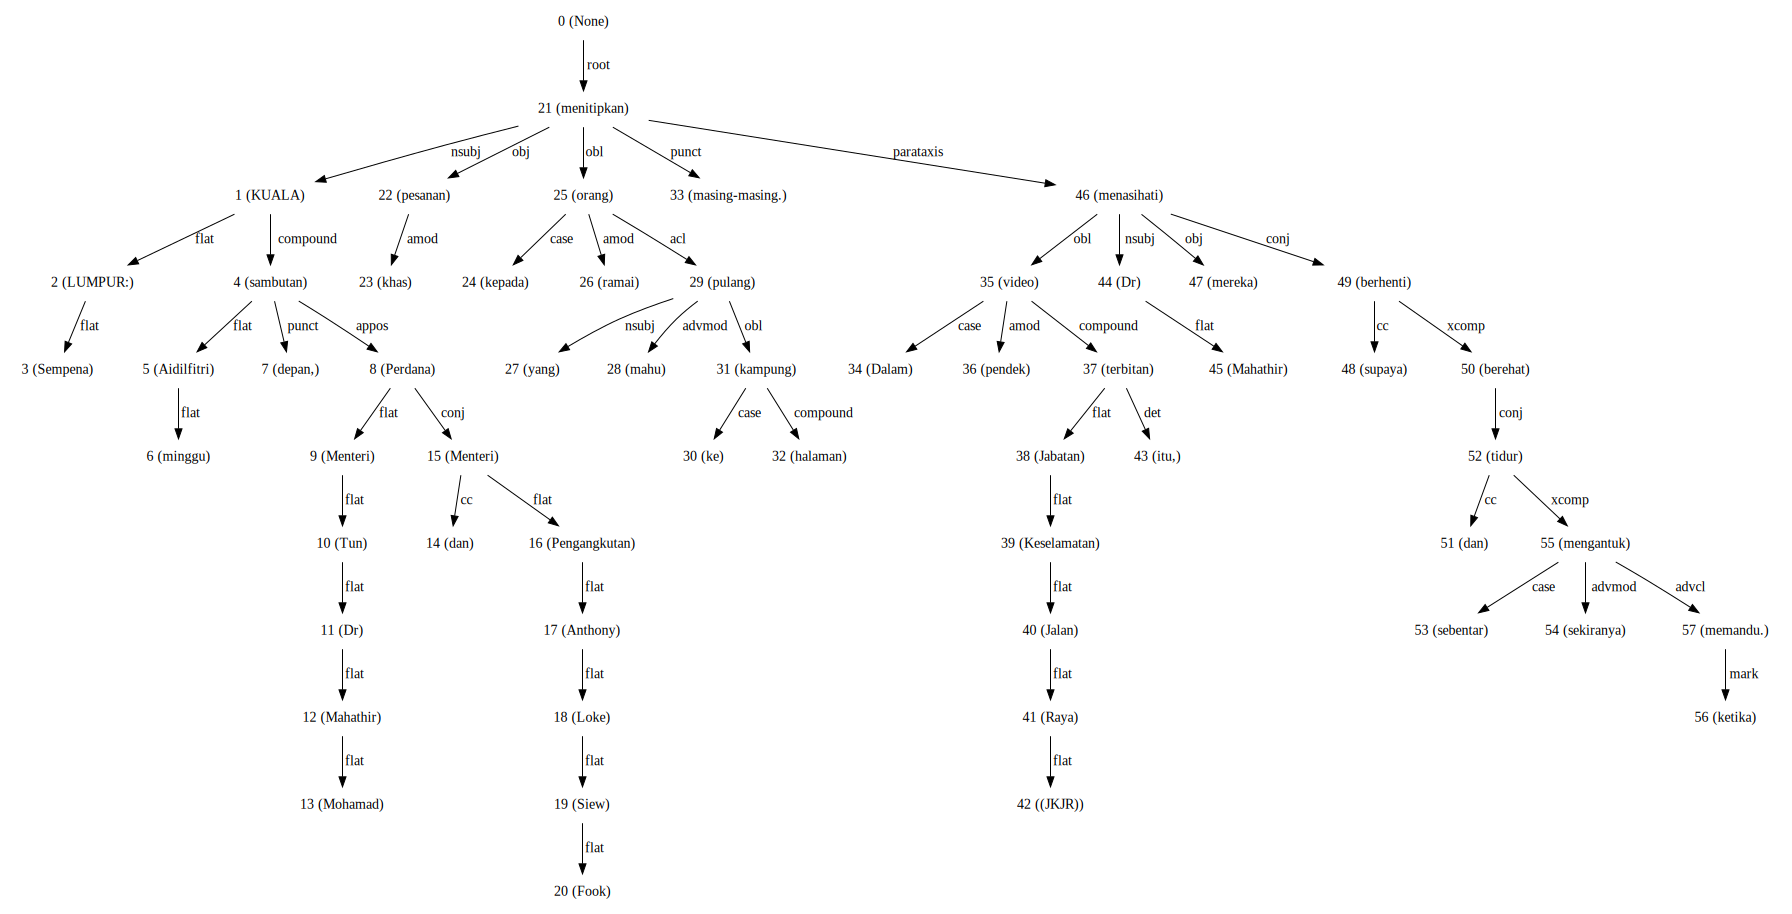

In [11]:
tagging, indexing = malaya.stack.voting_stack([tiny, small, small], string)
malaya.dependency.dependency_graph(tagging, indexing).to_graphvis()